In [1]:
import glob
from pyfasta import Fasta
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import assembly_categories
import os

In [38]:
data_to_insert = []
for filename in glob.glob("/home/rayan/serratus-assemblies-CoV_id95-60_reads100p_score30p.unique/*.fa"):
    #print(filename)
    accession = filename.replace('/home/rayan/serratus-assemblies-CoV_id95-60_reads100p_score30p.unique/','').\
                replace('.coronaspades.gene_clusters.checkv_filtered.fa','')
    print(accession)
    
    if os.stat(filename).st_size == 0:
        nb_contigs = 0
        total_length = 0
    else:
        f = Fasta(filename)
        nb_contigs = len(f.keys())
        total_length = sum([len(f[key]) for key in f.keys()])

    category = assembly_categories.get_category(total_length, nb_contigs)

    data_to_insert += [(accession, nb_contigs, total_length, category,'', '','', '')]
        
print(len(data_to_insert),"datasets")
data = pd.DataFrame(data_to_insert, columns=['Accession', 'NbContigs', 'TotalLength', 'Category', 'Organism', 'BestRef', 'LongestHit', 'IDY'])


SRR9831621
SRR8437727
SRR9419521
SRR11027563
SRR6411055
SRR11458633
SRR7522706
SRR6800489
SRR7899951
SRR8304481
ERR2738075
SRR6820465
ERR1301853
DRR169713
SRR6478571
SRR7699542
SRR8833171
ERR1301938
SRR9843170
SRR10412152
SRR6411038
SRR8389831
ERR1303238
SRR9089141
SRR8389823
SRR6925948
SRR11278415
SRR6925996
SRR9640819
SRR8389837
ERR2720647
SRR9211911
SRR8772198
SRR5062018
SRR8258957
SRR8113437
SRR7495340
ERR2030127
SRR6701612
SRR10112129
SRR10423914
SRR8304495
SRR8389821
SRR10522323
SRR6925977
SRR8772201
SRR7495336
ERR3994210
SRR7339903
SRR8833169
SRR7184467
ERR2029961
DRR169715
DRR083612
SRR9924866
SRR9089144
SRR7139952
SRR9640793
ERR2029885
SRR5964509
ERR2030101
ERR2737803
SRR10268271
SRR6411046
ERR1302141
SRR11611180
ERR3994141
SRR6898026
SRR5381487
SRR7031407
SRR7495347
SRR9419516
ERR2030163
SRR7632627
SRR6265752
SRR8772195
SRR11826186
DRR083610
SRR7811384
SRR10412150
SRR6375802
SRR7268700
SRR9640807
SRR6325460
SRR7031420
SRR6246044
SRR8617995
SRR8991387
SRR2991001
SRR6926008
SRR

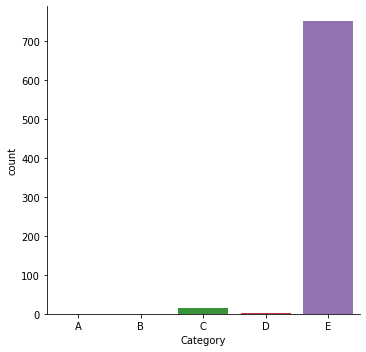

In [39]:

"""
    elif total_length > 5000 and total_length <= 25000:
        category = 'C'
    elif nb_contigs == 0:
        category = 'E'
    else:
        category = 'D'
"""
sns.catplot(x="Category", kind="count", order=('A','B','C','D','E'), data=data);

In [60]:
print(data[data['Category'] == 'C'].sort_values(by=['Accession']).to_markdown())

|     | Accession   |   NbContigs |   TotalLength | Category   | Organism                        |
|----:|:------------|------------:|--------------:|:-----------|:--------------------------------|
|  66 | ERR3994141  |           1 |         14188 | C          | Syngnathus typhle               |
| 318 | ERR3994142  |           1 |         10440 | C          | Syngnathus typhle               |
| 743 | ERR3994143  |           1 |         10910 | C          | Syngnathus typhle               |
| 575 | ERR3994223  |           1 |         19802 | C          | Syngnathus typhle               |
| 654 | SRR1324965  |           1 |         16484 | C          | Hippocampus kuda                |
| 114 | SRR2418623  |           1 |         17616 | C          | Microhyla fissipes              |
| 530 | SRR5997671  |           1 |          8273 | C          | Acanthemblemaria sp. CUR14058.G |
| 500 | SRR7226349  |           1 |          5849 | C          | Silurus asotus                  |
|  42 | SR

In [57]:
print(data[data['Category'] == 'C']['Accession'].to_string(index=False))

 SRR9211911
 SRR8389821
 ERR3994141
 SRR2418623
 ERR3994142
 SRR8389835
 SRR7226349
 SRR5997671
 SRR9211912
 ERR3994223
 SRR8389822
 SRR1324965
 ERR3994143
 SRR8389847


In [84]:
import csv
sra = csv.DictReader(open("sra/lucky14.txt"))
lucky14 = set()
for row in sra:
    acc = row['acc']
    lucky14.add(acc)
    print(acc,row['Organism'])
    data.loc[data.Accession == acc,'Organism'] = row['Organism']
    
data[data['Category'] == 'C'].sort_values(by=['Accession'])

SRR1324965 Hippocampus kuda
SRR2418623 Microhyla fissipes
SRR7226349 Silurus asotus
SRR5997671 Acanthemblemaria sp. CUR14058.G
SRR9211911 Ambystoma mexicanum
SRR9211912 Ambystoma mexicanum
SRR8389847 Caretta caretta
SRR8389821 Chelonia mydas
SRR8389822 Chelonia mydas
SRR8389835 Chelonia mydas
ERR3994141 Syngnathus typhle
ERR3994142 Syngnathus typhle
ERR3994143 Syngnathus typhle
ERR3994223 Syngnathus typhle


,Accession,NbContigs,TotalLength,Category,Organism
66,ERR3994141,1,14188,C,Syngnathus typhle
318,ERR3994142,1,10440,C,Syngnathus typhle
743,ERR3994143,1,10910,C,Syngnathus typhle
575,ERR3994223,1,19802,C,Syngnathus typhle
654,SRR1324965,1,16484,C,Hippocampus kuda
114,SRR2418623,1,17616,C,Microhyla fissipes
530,SRR5997671,1,8273,C,Acanthemblemaria sp. CUR14058.G
500,SRR7226349,1,5849,C,Silurus asotus
42,SRR8389821,1,14666,C,Chelonia mydas
620,SRR8389822,1,20715,C,Chelonia mydas


In [91]:
bgc_res = []
for bgc in glob.glob("/home/rayan/serratus-assemblies-CoV_id95-60_reads100p_score30p.unique/*.txt"):
    if os.stat(bgc).st_size == 0:
        continue
    else:
        f = open(bgc)
        bgc_data = f.read().split('\n')
        nb_cov_bgc = 0
        for line in bgc_data:
            if line.startswith("#"): continue
            if not "CoV_" in line: continue
            if " " in line: continue
            nb_cov_bgc += 1 #int(line.split()[-1])
        if nb_cov_bgc >= 2:
            accession = bgc.replace('/home/rayan/serratus-assemblies-CoV_id95-60_reads100p_score30p.unique/','').replace('.coronaspades.bgc_statistics.txt','')
            if accession in lucky14: continue
            #print(nb_cov_bgc, accession)
            print(accession)
            bgc_res += [(nb_cov_bgc, accession)]
            print(accession)
    
print("---")
organisms = dict()
import csv
sra = csv.DictReader(open("sra/lucky14_16_more.txt"))
for row in sra:
    acc = row['Run']
    print(acc,row['Organism'])
    organisms[acc] = row['Organism']
    
print(len(bgc_res),"accessions")
for nb,acc in sorted(bgc_res)[::-1]:
    print('| %d | [%s](%s) | %s | ' % (nb,acc, "https://serratus-public.s3.amazonaws.com/assemblies/other/%s.coronaspades/%s.coronaspades.bgc_statistics.txt" % (acc,acc), organisms[acc]))

SRR8389832
SRR8389832
SRR8389849
SRR8389849
SRR8389831
SRR8389831
SRR8389825
SRR8389825
ERR3994145
ERR3994145
SRR8181903
SRR8181903
SRR7061292
SRR7061292
SRR2418554
SRR2418554
SRR5997814
SRR5997814
SRR6788810
SRR6788810
SRR8389837
SRR8389837
SRR8389794
SRR8389794
SRR8389793
SRR8389793
ERR3994210
ERR3994210
SRR8389791
SRR8389791
SRR8389823
SRR8389823
---
SRR5997814 Percopsis omiscomaycus
SRR2418554 Microhyla fissipes
SRR6788810 Ambystoma mexicanum
SRR7061292 Danio rerio
SRR8389793 Caretta caretta
SRR8389825 Chelonia mydas
SRR8389837 Chelonia mydas
SRR8389849 Caretta caretta
SRR8389791 Caretta caretta
SRR8389794 Caretta caretta
SRR8389823 Chelonia mydas
SRR8389831 Caretta caretta
SRR8389832 Caretta caretta
SRR8181903 Microhyla fissipes
ERR3994145 Syngnathus typhle
ERR3994210 Syngnathus typhle
16 accessions
| 7 | [SRR8389793](https://serratus-public.s3.amazonaws.com/assemblies/other/SRR8389793.coronaspades/SRR8389793.coronaspades.bgc_statistics.txt) | Caretta caretta | 
| 7 | [SRR8389791]

In [43]:
fh = gzip.open("lucky_14.fa.blastx-fmt6")

from blast import parse

buffer = ""
def print_later(*args):
    s = " ".join(map(str,args))
    global buffer
    buffer += s + "\n"
    
# loop over assemblies
for blast_record in parse(fh):
    #print('query id: {}'.format(blast_record.qid))
    query = blast_record.qid.decode()
    accession = query.split('.')[0]
    query_length = int(query.split("_")[3])
    ref_length = None
    best_ref = None
    query_cov_array = [0] * query_length
    ref_cov_array = None
    buffer = ""
    identities = []
    nb_alns_best_ref = 0
    longest_aln_length = 0
    
    # parse alignments between this assembly and nt
    for hit in blast_record.hits:
        for hsp in hit:
            if best_ref is None:
                # set the only reference we'll ever look at (the best one), discarding any other reference in further hsp
                best_ref = hsp.sid
                ref_length = get_ref_length(best_ref) 
                ref_cov_array = [0] * ref_length
            else:
                if hsp.sid != best_ref:
                    continue
                    
            nb_alns_best_ref += 1
            longest_aln_length = max(longest_aln_length, hsp.length)
            
            print_later('****Alignment****')
            print_later('aligns_to:', hsp.sid)
            print_later('aln_length:', hsp.length, '/', query_length)
            print_later('e value:', hsp.evalue)
            
            if hsp.pident < 90 and hsp.length > 1000:
                print("!",query,hsp.pident,hsp.length) #potentially interesting hit
            
            # record which positions of the query (=assembly) are covered by an alignment to the best reference
            assert(hsp.qstart < hsp.qend)
            for i in range(hsp.qstart, hsp.qend): 
                query_cov_array[i] += 1
                
            # do same for positions of the reference
            if hsp.sstart > hsp.send:
                hsp.sstart, hsp.send =  hsp.send, hsp.sstart
            for i in range(hsp.sstart, hsp.send): 
                ref_cov_array[i] += 1
                
            identities += [hsp.pident]
            
    idy_stdev = 0 if len(identities) < 2 else statistics.stdev(identities)
    
    data.loc[data.Accession == accession, 'BestRef'] = best_ref
    data.loc[data.Accession == accession, 'LongestHit'] = best_ref
    data.loc[data.Accession == accession, 'IDY'] = best_ref
    
    #break
   
fh.close()

NameError: name 'gzip' is not defined